### テストデータ過剰による過学習

係数（学習データ） [[-113.73564278   86.125579    156.89990273 -160.91547429  -43.59917418
   100.98521798   -6.83136678  -24.84795049    4.77532734]]
切片（学習データ） [-0.16748202]
決定係数（学習データ） 0.8882249517395575
決定係数（テストデータ） 0.752021923273144


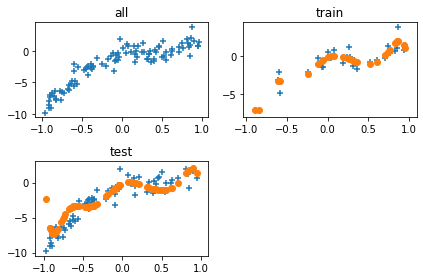

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x=np.random.rand(100,1)  # 0～１までの乱数を100個作る

# ばらつきのあるy=4x^3 - 3x^2 -1のデータを作成

x=x*2-1  # x値0～１を-1～１に変更
y=4*x**3 - 3*x**2 + 2*x - 1
y+=np.random.randn(100,1)  # 標準正規分布（平均０、標準偏差１）の乱数を加える

x_train=x[:30]
y_train=y[:30]

# テストデータ70個（過剰）
x_test=x[30:]
y_test=y[30:]


### 最小二乗法で 9 次式として回帰をとってみる

from sklearn import linear_model

# 学習用の入力データ
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)


### 係数、切片、学習データによる決定係数を表示

print('係数（学習データ）', model.coef_)
print('切片（学習データ）', model.intercept_)

print('決定係数（学習データ）', model.score(X_TRAIN, y_train))


### テストデータによる決定係数を表示

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('決定係数（テストデータ）', model.score(X_TEST, y_test))


### グラフ表示

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()
plt.show()


係数（学習データ） [[ 0.63395717  0.00855626  0.94372958 -0.39734395  1.29503827 -1.06232511
   1.62020392 -2.04610817  1.52120019]]
切片（学習データ） [-0.74616587]
決定係数（学習データ） 0.9131104146497868
決定係数（テストデータ） 0.8395480737073239


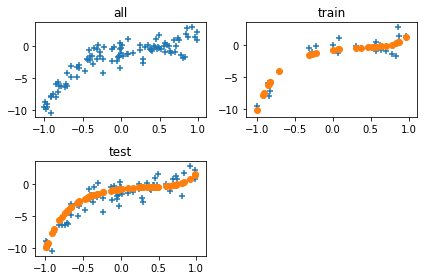

In [6]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np


### バラつきのある y = 4x^3 - 3x^2 + 2x - 1 のデータを作成

x = np.random.rand(100, 1)  # 0 〜 1 までの乱数を 100 個つくる
x = x * 2 - 1               # 値の範囲を -2 〜 2 に変更

y = 4 * x**3 - 3 * x**2 + 2 * x - 1

y += np.random.randn(100, 1)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える

# 学習データ 30 個
x_train = x[:30]
y_train = y[:30]

# テストデータ 30 個
x_test = x[30:]
y_test = y[30:]


### Ridge で 9 次式として回帰をとってみる

from sklearn import linear_model

# 学習用の入力データ
X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                x_train**4, x_train**3, x_train**2, x_train]

# 罰則付き回帰　sklearn.linear_model.Ridge()
model = linear_model.Ridge()
model.fit(X_TRAIN, y_train)


### 係数、切片、学習データによる決定係数を表示

print('係数（学習データ）', model.coef_)
print('切片（学習データ）', model.intercept_)

print('決定係数（学習データ）', model.score(X_TRAIN, y_train))


### テストデータによる決定係数を表示

X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
               x_test**4, x_test**3, x_test**2, x_test]

print('決定係数（テストデータ）', model.score(X_TEST, y_test))


### グラフ表示

plt.subplot(2, 2, 1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2, 2, 2)
plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN), marker='o')
plt.title('train')

plt.subplot(2, 2, 3)
plt.scatter(x_test, y_test, marker='+')
plt.scatter(x_test, model.predict(X_TEST), marker='o')
plt.title('test')

plt.tight_layout()
plt.show()


係数 [0.01993606]
切片 -0.10746402890115381
決定係数 0.008813610662359417


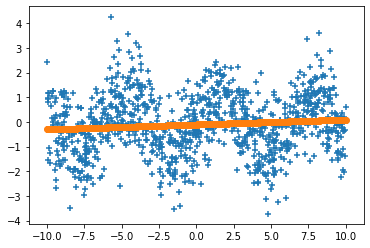

In [10]:
# -*- coding: utf-8 -*-

import math

import numpy as np
import matplotlib.pyplot as plt


### バラつきのある正弦波データを作成

x = np.random.rand(1000, 1)  # 0 〜 1 までの乱数を 1000 個つくる
x = x * 20 - 10              # 値の範囲を -10 〜 10 に変更

y = np.array([math.sin(v) for v in x])  # 正弦波カーブ
y += np.random.randn(1000)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習: 最小二乗法

from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(x, y)


### 係数、切片、決定係数を表示

print('係数', model.coef_)
print('切片', model.intercept_)

r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()


### サポートベクターマシンは分類・回帰フィッターあり


決定係数 0.3266057272745001


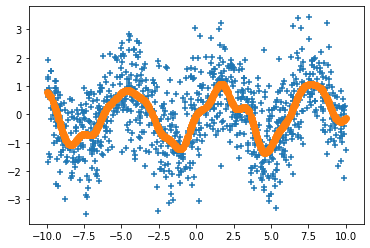

In [12]:
# -*- coding: utf-8 -*-

import math

import numpy as np
import matplotlib.pyplot as plt


### バラつきのある正弦波データを作成

x = np.random.rand(1000, 1)  # 0 〜 1 までの乱数を 1000 個つくる
x = x * 20 - 10              # 値の範囲を -10 〜 10 に変更

y = np.array([math.sin(v) for v in x])  # 正弦波カーブ
y += np.random.randn(1000)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習: Support Vector Machine
# SVMのRegressorなのでSVR

from sklearn import svm


model = svm.SVR()
model.fit(x, y)


### 決定係数を表示

r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()


決定係数 0.8263396667083747


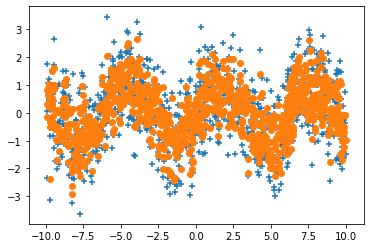

In [15]:
import math

import numpy as np
import matplotlib.pyplot as plt


### バラつきのある正弦波データを作成

x = np.random.rand(1000, 1)  # 0 〜 1 までの乱数を 1000 個つくる
x = x * 20 - 10              # 値の範囲を -10 〜 10 に変更

y = np.array([math.sin(v) for v in x])  # 正弦波カーブ
y += np.random.randn(1000)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習: Random Forest

from sklearn import ensemble


model = ensemble.RandomForestRegressor()
model.fit(x, y)


### 決定係数を表示

r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()


### K近傍法
データの近傍性に基づく学習法<br>
未知のデータに対して、もっとも近いk個の学習データを選び出す<br>
<code>from sklearn import neighbors.KNeighborsRegressor</code>

決定係数 0.46026150522268205


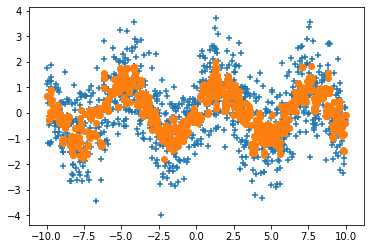

In [16]:
import math

import numpy as np
import matplotlib.pyplot as plt


### バラつきのある正弦波データを作成

x = np.random.rand(1000, 1)  # 0 〜 1 までの乱数を 1000 個つくる
x = x * 20 - 10              # 値の範囲を -10 〜 10 に変更

y = np.array([math.sin(v) for v in x])  # 正弦波カーブ
y += np.random.randn(1000)  # 標準正規分布（平均 0, 標準偏差 1）の乱数を加える


### 学習: k-近傍法

from sklearn import neighbors


model = neighbors.KNeighborsRegressor()
model.fit(x, y)


### 決定係数を表示

r2 = model.score(x, y)
print('決定係数', r2)


### グラフ表示

plt.scatter(x, y, marker='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()
